<a href="https://colab.research.google.com/github/volinhbao/CS112.L11.KHTN/blob/master/Week%206/DIALAN_REPORT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nhóm 7
# Nguyễn Quốc Cường
# Nguyễn Trung Hiếu
# Võ Linh Bảo



#ĐỀ BÀI:
Giáo sư Braun đã lai giống tạo ra n loại địa lan mới độc đáo. Mỗi loại địa lan được trồng trong một chậu riêng và được ghi một số thể hiện đặc điểm gene của loại hoa đó, chậu thứ i có số là ai, i = 1 ÷ n.

Hội chợ hoa địa lan thế giới mời giáo sư tham gia và giới thiệu các thành quả nghiên cứu của ông. Các chậu hoa do ông mang tới sẽ được đặt trên k đôn dọc theo đường đi dẫn tới gian hàng chính của hội chợ. 

Muốn gây ấn tượng mạnh cho những người tham dự, đặc biệt là các nhà khoa học Giáo sư yêu cầu trợ lý của mình chọn k chậu sao cho khi thực hiện phép AND số trên các chậu hoa tới (nếu xét chúng ở dạng biểu diễn nhị phân) sẽ có kết quả bằng 0.

Hãy xác định xem người trợ lý có thể chọn được k chậu như vậy hay không và đưa ra thông báo “YES” hoặc “NO”.

Dữ liệu: Vào từ thiết bị nhập chuẩn:

Dòng đầu tiên chứa 2 số nguyên $n$ và $k$ $(1 ≤ n ≤ 2×10^4, 1 ≤ k ≤ n)$,
Dòng thứ 2 chứa $n$ số nguyên $a_1, a_2, . . ., a_n$ $(0 ≤ a_i < 2^{12}, i = 1 ÷ n)$.
Kết quả: Đưa ra thiết bị xuất chuẩn thông báo tìm được.
Ví dụ
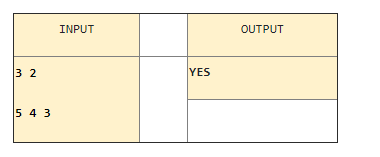

#ABSTRACTION:
Có tồn tại hay không 1 cách chọn k tập hợp từ n tập hợp sao cho hợp của những tập chọn ra có đúng l phần tử khác nhau  
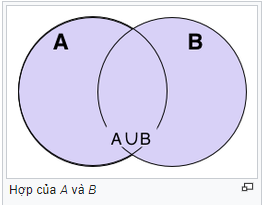

#PATTERN RECOGNITION
Để xác định có hay không 1 cách chọn tối đa k tập hợp thỏa mãn yêu cầu, ta có thể tìm số tập hợp tối thiểu thỏa mãn yêu cầu. Nếu kết quả nhỏ hơn k, ta sẽ có đáp án là "YES".Ngược lại là "NO"   
$\rightarrow$ Bài toán tìm min/max 

#ALGORITHM DESIGN
##Thuật toán 1:
Duyệt qua tất cả các tổ hợp chập 1,2,3,...,k của n phần tử từ 1 đến n. Ứng với mỗi tổ hợp chọn được, ta thực hiên phép AND các phần tử của dãy a có chỉ số nằm trong tổ hợp chọn được  
  
Tập hợp n phần tử từ 1 đến n: ${(1,2,3,...,n)}$  
Tập hợp con 2 phần tử của n phần tử từ 1 đến n: ${(1,2)},{(1,3)},...,{(1,n)},{(2,3)}...,{(n-1,n)}$
...  
Tập hợp con k phần tử của n phần tử từ 1 đến n: ${(1,2,3,...,k)},...,{(n-k,n-k+1,...,n)}$

Giả sử ta đang xét tổ hợp $(3,5,8)$, ta xét $a_3$ AND $a_5$ AND $a_8$. Nếu kết quả là 0 và 3(độ dài tổ hợp $(3,5,8)$) bé hơn $k$. Ta có kết quả chắc chắn là YES

ĐỘ PHỨC TẠP: O($(C_{1}^n+C_{2}^n+...+C_{k}^n)*n$)

## Thuật toán 2:
Để dễ tưởng tượng, ta đảo bit của các phần tử $a_i$.Lúc này thay vì các phần tử AND ra 0, ta cần các phần tử OR ra $2^{12}-1$  
Sử dụng quy hoạch động:
- dp[i][x] là số phần tử trong tập $a_1,a_2,...,a_i$ OR nhau ra x
- Trường hợp đơn giản: $dp[i][0]$ = 0
- Công thức quy hoạch động:  $dp[i][x]$ = min($dp[i][x]$,$dp[i-1][x']+1$) $\forall x'$ OR $a_i=x$

ĐỘ PHỨC TẠP: O($2^{12}*n$)

## PSEUDO CODE
```
input -> n,k
input -> a1,a2,...,an
inverse bit of elements of a
dp[i][0] = 0
for i:1->n:
  for x:0->(2^12)-1:
    dp[i][x] = min(dp[i][x],dp[i-1][x']+1) for x' OR ai = x
  if dp[i][2^(12)-1] <= k:
    print('YES')
    exit
print('NO')
```

## EXECUTION

In [2]:
n,k = map(int,input().split())
a = list(map(int,input().split()))
for i in range(n):
	a[i] = a[i]^((1<<12)-1)

# print(a)
# print(4090|4093)
# print((1<<12)-1)

dp = [-1 for i in range(1<<12)]
accept = set()
def process():
	dp[0] = 0
	accept.add(0)
	for i in range(n):
		tmp = []
		for mask in accept:
			new_mask = mask | a[i]
			if (new_mask > a[i] or mask == 0) and new_mask > mask:
				if dp[new_mask] == -1:
					dp[new_mask] = dp[mask] + 1
					tmp.append(new_mask)
				else:
					dp[new_mask] = min(dp[new_mask],dp[mask] + 1)
		accept.update(tmp)
		if dp[(1<<12)-1] <= k and dp[(1<<12)-1]!=-1:
			print('YES')
			return
	print('NO')

process()

3 2
5 4 3
YES
